4


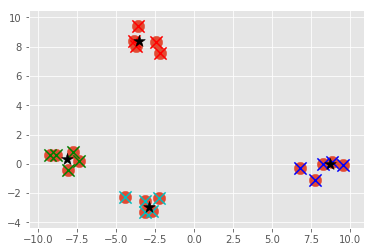

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import random

centers = random.randrange(2,5)
print(centers)
X, y = make_blobs(n_samples=20, centers=centers, n_features=2)

'''X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])'''

#provide array of colors for easy way of iterating through many different colors during graphing
colors = 10*["g", "r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius = None, radius_norm_step = 100 ):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    def fit(self,data):
        
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
            
            
        
        centroids = {}
        
        for val in range(len(data)):
            centroids[val] = data[val]

        weights = [vall for vall in range(self.radius_norm_step)][::-1]    
        
        while True:
            new_centroids = []
            for val2 in centroids:
                in_radius = []
                centroid = centroids[val2]
                for featureset in data:
                    distance = np.linalg.norm(featureset - centroid)
                    if distance == 0:
                        distance = 0.000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_radius += to_add
                    
                    
                    #This is the left out code from switching to dynamic radius fitting.
                    '''if np.linalg.norm(featureset-centroid) < self.radius:
                        in_radius.append(featureset)'''
                
                new_centroid = np.average(in_radius, axis=0)
                #Made this a tuple in order to utilize set; using np.unique would return too many values
                new_centroids.append(tuple(new_centroid))
                
            #use of set is better than np.unique in this instance due to over selecting values.    
            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            
            for num in uniques:
                for num2 in uniques:
                    if num == num2:
                        pass
                    elif np.linalg.norm(np.array(num)-np.array(num2)) <= self.radius:
                        to_pop.append(num2)
                        break
            
            for pop in to_pop:
                try:
                    uniques.remove(pop)
                except:
                    pass
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for val3 in range(len(uniques)):
                centroids[val3] = np.array(uniques[val3])
            
            optimized = True

            for val4 in centroids:
                if not np.array_equal(centroids[val4], prev_centroids[val4]):
                    optimized = False
                if not optimized:
                    break
            if optimized:
                break

        self.centroids = centroids
        
        self.classifications = {}
        
        for val4 in range(len(self.centroids)):
            self.classifications[val4] = []
        
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)

    def predict(self,data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distance.index(min(distances))
        return classification

clf = Mean_Shift()
clf.fit(X)

#pull out the centroids from above class
centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker ='x', color=color, s=150, linewidths=5)

#plot out the centroids
for cent in centroids:
    plt.scatter(centroids[cent][0], centroids[cent][1], color='k', marker='*', s=150)

plt.show()